In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from scipy.special import expit
from scipy.optimize import fmin, minimize
import glob as glob
import matplotlib
matplotlib.style.use('ggplot')

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Retrieve Weather Data

In [2]:
all_weather = pd.read_csv("weather01-16.csv")
all_weather.index = pd.DatetimeIndex(all_weather.date)
all_weather = all_weather.drop(['date'],axis=1)

## Retrieve Dengue Data

In [3]:
all_dengues = pd.read_csv("all-dengues.csv")
all_dengues.index = pd.DatetimeIndex(all_dengues.date)
all_dengues = all_dengues.drop(['date','date.1'],axis=1)

## Select specific period and province for both weather and dengue to plot
the period should be from 2003 to 2016. Try with Chiang Rai and Chiang Mai to begin with

In [4]:
def select_period(data):
    period_mask = (data.index > "2003") & (data.index < "2016")
    return data[period_mask]

In [5]:
cr_dengues = all_dengues[all_dengues['จังหวัด'] == 'ChiangRai']
cr_dengues = cr_dengues.resample('W').size()
cr_dengues_df = pd.DataFrame(cr_dengues,columns=['cases'])
cr_dengues_df = select_period(cr_dengues_df)

cr_weather = all_weather[all_weather['stn_name'] == 'Chiang Rai']
cr_weather = cr_weather.drop(['dday','month','stn_code','year'],axis=1)
cr_weather_df = cr_weather.resample('W').mean()
cr_weather_df = select_period(cr_weather_df)

In [24]:
def compare_graph(dengues,weather,title):
    plt.figure(figsize=(30,6))
    dengue_mean = (dengues.cases - dengues.cases.mean()) / dengues.cases.std()
    weather_meantemp = (weather.meantemp - weather.meantemp.mean()) / weather.meantemp.std()
    weather_rain = (weather.rain - weather.rain.mean()) / weather.rain.std()
    weather_avgrh = (weather.avgrh - weather.avgrh.mean()) / weather.avgrh.std()
    
    dengue_mean.plot()
    weather_meantemp.plot()
    weather_rain.plot()
    weather_avgrh.plot()
    
    plt.legend()
    plt.title(title)


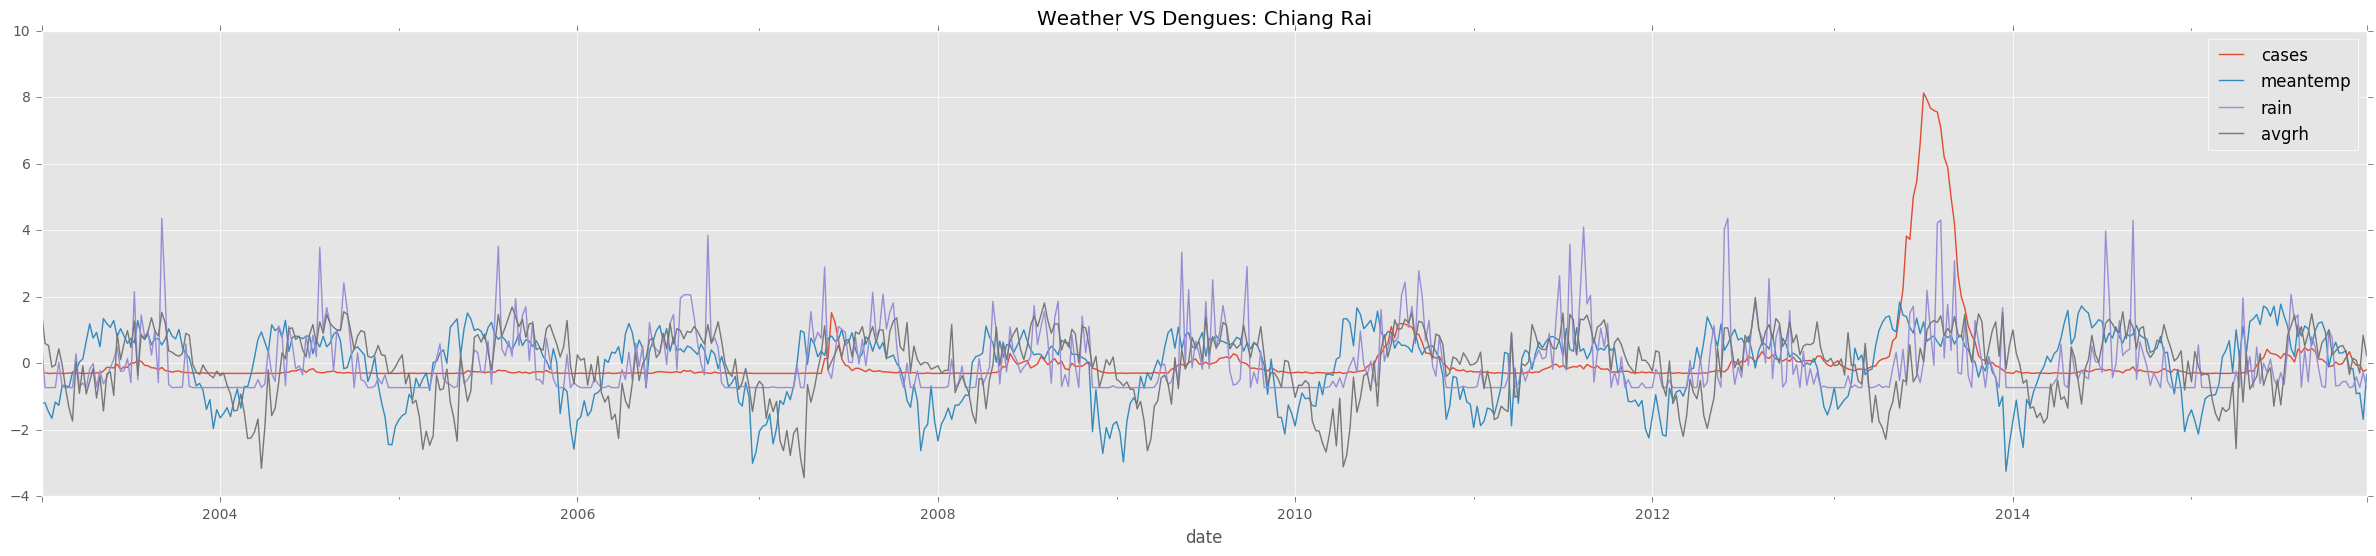

In [25]:
compare_graph(cr_dengues_df,cr_weather_df,"Weather VS Dengues: Chiang Rai")


In [17]:
# plt.figure(figsize=(12,6))
# cr_dengues_df.cases.plot()
# cr_weather_df.meantemp.plot()
# cr_weather_df.rain.plot()
# cr_weather_df.avgrh.plot()
# plt.legend()
# plt.title("Weather VS Dengues: Chiang Rai")

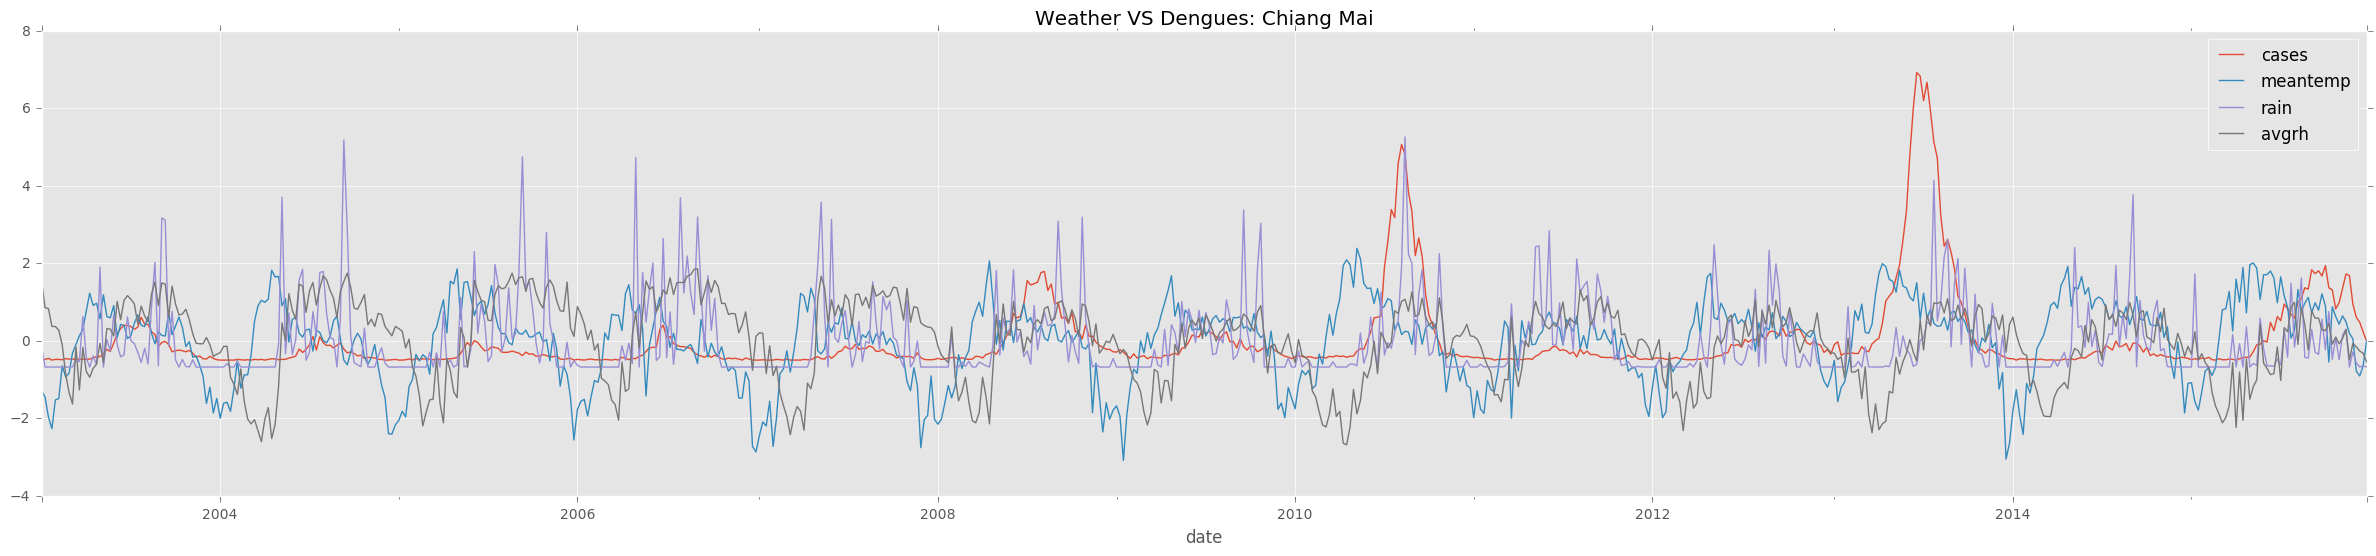

In [26]:
cm_dengues = all_dengues[all_dengues['จังหวัด'] == 'ChiangMai']
cm_dengues = cm_dengues.resample('W').size()
cm_dengues_df = pd.DataFrame(cm_dengues,columns=['cases'])
cm_dengues_df = select_period(cm_dengues_df)

cm_weather = all_weather[all_weather['stn_name'] == 'Chiang Mai']
cm_weather = cm_weather.drop(['dday','month','stn_code','year'],axis=1)
cm_weather_df = cm_weather.resample('W').mean()
cm_weather_df = select_period(cm_weather_df)

compare_graph(cm_dengues_df,cm_weather_df,"Weather VS Dengues: Chiang Mai")

# plt.figure(figsize=(12,6))
# cm_dengues_df.cases.plot()
# cm_weather_df.meantemp.plot()
# cm_weather_df.rain.plot()
# cm_weather_df.avgrh.plot()
# plt.legend()
# plt.title("Weather VS Dengues: Chiang Mai")